In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("processed_data/total_yields.csv")
df

,area,year,crop,yield,yield_1,yield_2,yield_3,yield_4,yield_5,avg_temp,...,tonnes_pesticide,tonnes_pesticide_1,tonnes_pesticide_2,tonnes_pesticide_3,tonnes_nitrogen,tonnes_nitrogen_1,tonnes_nitrogen_2,tonnes_nitrogen_3,arable_land,ag_land
0,Albania,2008,Maize,50000,46732,50111,45442,46197,42805,16.71,...,1069.54,1006.57,943.61,880.64,28744.80,31483.82,30333.88,37210.64,610.0,1181.0
1,Albania,2008,Potatoes,193878,188902,170745,167061,149346,151301,16.71,...,1069.54,1006.57,943.61,880.64,28744.80,31483.82,30333.88,37210.64,610.0,1181.0
2,Albania,2008,Wheat,40168,35496,30787,31582,31130,28629,16.71,...,1069.54,1006.57,943.61,880.64,28744.80,31483.82,30333.88,37210.64,610.0,1181.0
3,Albania,2008,Soybeans,20000,20000,20000,17500,13333,12107,16.71,...,1069.54,1006.57,943.61,880.64,28744.80,31483.82,30333.88,37210.64,610.0,1181.0
4,Albania,2009,Maize,55693,50000,46732,50111,45442,46197,16.73,...,1132.50,1069.54,1006.57,943.61,33940.18,28744.80,31483.82,30333.88,609.0,1201.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,Zimbabwe,2013,Wheat,22888,24420,26274,27681,30000,30097,19.76,...,2550.07,3375.53,3340.35,3305.17,51800.00,41000.00,59563.00,70502.00,4000.0,16200.0
3824,Zimbabwe,2013,Sorghum,3066,2046,2267,2702,3230,2577,19.76,...,2550.07,3375.53,3340.35,3305.17,51800.00,41000.00,59563.00,70502.00,4000.0,16200.0
3825,Zimbabwe,2013,Soybeans,13142,15300,12054,13557,15000,16129,19.76,...,2550.07,3375.53,3340.35,3305.17,51800.00,41000.00,59563.00,70502.00,4000.0,16200.0
3826,Zimbabwe,2013,Cassava,46000,47010,45589,45152,44708,44259,19.76,...,2550.07,3375.53,3340.35,3305.17,51800.00,41000.00,59563.00,70502.00,4000.0,16200.0


In [3]:
df.columns

Index(['area', 'year', 'crop', 'yield', 'yield_1', 'yield_2', 'yield_3',
       'yield_4', 'yield_5', 'avg_temp', 'avg_temp_1', 'avg_temp_2',
       'avg_temp_3', 'avg_temp_4', 'avg_temp_5', 'latitude', 'longitude',
       'tonnes_potash', 'tonnes_potash_1', 'tonnes_potash_2',
       'tonnes_potash_3', 'tonnes_phosph', 'tonnes_phosph_1',
       'tonnes_phosph_2', 'tonnes_phosph_3', 'tonnes_pesticide',
       'tonnes_pesticide_1', 'tonnes_pesticide_2', 'tonnes_pesticide_3',
       'tonnes_nitrogen', 'tonnes_nitrogen_1', 'tonnes_nitrogen_2',
       'tonnes_nitrogen_3', 'arable_land', 'ag_land'],
      dtype='object')

In [4]:
countries = df["area"].unique()
countries

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Taiwan', 'Colombia',
       "Côte d'Ivoire", 'Croatia', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kenya', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Madagascar',
       'Malawi', 'Malaysia', 'Mali', 'Mauritius', 'Mexico', 'Morocco',
       'Mozambique', 'Namibia', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Niger', 'North Macedonia', 'Norway', 'Pakistan',
       'Papua

In [5]:
x = df[df['area'] == 'Albania'][['yield_1', 'yield_2', 'yield_3', 'yield_4', 'yield_5', \
                   'avg_temp', 'avg_temp_1','avg_temp_2','avg_temp_3', 'avg_temp_4', 'avg_temp_5', \
                   'tonnes_potash', 'tonnes_potash_1', 'tonnes_potash_2', 'tonnes_potash_3', \
                   'tonnes_phosph', 'tonnes_phosph_1','tonnes_phosph_2', 'tonnes_phosph_3', \
                   'tonnes_pesticide', 'tonnes_pesticide_1', 'tonnes_pesticide_2', 'tonnes_pesticide_3', \
                  'tonnes_nitrogen', 'tonnes_nitrogen_1', 'tonnes_nitrogen_2', 'tonnes_nitrogen_3', \
                  'arable_land', 'ag_land']]
y = df[df['area'] == 'Albania']['yield']

In [6]:
predictions_df = pd.DataFrame(columns = ['area', 'crop', 'lat', 'long', 'yield_2013', \
                                         'yield_2013_pred', 'yield_2013_diff', 'perc_err'])

for country in countries:
    country_rows = df[df['area'] == country]
    crops = country_rows['crop'].unique()
    for crop in crops:
        crop_rows = country_rows[country_rows['crop'] == crop] #rows = 6
        
        crops_08_12 = crop_rows[crop_rows['year'] != 2013] #rows = 5
        x = crops_08_12[['yield_1', 'yield_2', 'yield_3', 'yield_4', 'yield_5', \
                   'avg_temp', 'avg_temp_1','avg_temp_2','avg_temp_3', 'avg_temp_4', 'avg_temp_5', \
                   'tonnes_potash', 'tonnes_potash_1', 'tonnes_potash_2', 'tonnes_potash_3', \
                   'tonnes_phosph', 'tonnes_phosph_1','tonnes_phosph_2', 'tonnes_phosph_3', \
                   'tonnes_pesticide', 'tonnes_pesticide_1', 'tonnes_pesticide_2', 'tonnes_pesticide_3', \
                  'tonnes_nitrogen', 'tonnes_nitrogen_1', 'tonnes_nitrogen_2', 'tonnes_nitrogen_3', \
                  'arable_land', 'ag_land']]
        y = crops_08_12['yield']
        
        #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
        
        scaler = StandardScaler()
        x_scaler = scaler.fit(x)
        #x_scaler = scaler.fit(x_train)
        #x_train_scaled = x_scaler.transform(x_train)
        #x_test_scaled = x_scaler.transform(x_test)
        x_train_scaled = x_scaler.transform(x)
        y_train = y
        
        mlr = LinearRegression()
        mlr.fit(x_train_scaled, y_train)
        
        crops_13 = crop_rows[crop_rows['year'] == 2013] #rows = 1
        x_test = crops_13[['yield_1', 'yield_2', 'yield_3', 'yield_4', 'yield_5', \
                   'avg_temp', 'avg_temp_1','avg_temp_2','avg_temp_3', 'avg_temp_4', 'avg_temp_5', \
                   'tonnes_potash', 'tonnes_potash_1', 'tonnes_potash_2', 'tonnes_potash_3', \
                   'tonnes_phosph', 'tonnes_phosph_1','tonnes_phosph_2', 'tonnes_phosph_3', \
                   'tonnes_pesticide', 'tonnes_pesticide_1', 'tonnes_pesticide_2', 'tonnes_pesticide_3', \
                  'tonnes_nitrogen', 'tonnes_nitrogen_1', 'tonnes_nitrogen_2', 'tonnes_nitrogen_3', \
                  'arable_land', 'ag_land']]
        x_test_scaled = x_scaler.transform(x_test)
        y_test = crops_13['yield']
        pred_13 = mlr.predict(x_test_scaled)
        perc_err = np.abs((y_test - pred_13) / y_test * 100)
        
        #pred_08_12 = mlr.predict(x_test_scaled)
        #rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_08_12))
        #rsq = mlr.score(x_test_scaled, y_test)*100
        #rsq = mlr.score(x_pred_scaled, y_actual)*100
        
        row = {'area': country, 'crop': crop, 'lat':crops_13['latitude'], 'long':crops_13['longitude'], 'yield_2013': y_test, 'yield_2013_pred': pred_13, \
               'yield_2013_diff': y_test - pred_13, 'perc_err': perc_err}
        row_df = pd.DataFrame(row)
        predictions_df = pd.concat([predictions_df, row_df], axis=0, ignore_index=True)
predictions_df

,area,crop,lat,long,yield_2013,yield_2013_pred,yield_2013_diff,perc_err
0,Albania,Maize,41.153332,20.168331,69533,66770.792339,2762.207661,3.972513
1,Albania,Potatoes,41.153332,20.168331,260110,249846.62375,10263.37625,3.945783
2,Albania,Wheat,41.153332,20.168331,41292,40802.600664,489.399336,1.185216
3,Albania,Soybeans,41.153332,20.168331,10000,17743.403174,-7743.403174,77.434032
4,Algeria,Maize,28.033886,1.659626,33649,25145.994589,8503.005411,25.269712
...,...,...,...,...,...,...,...,...
633,Zimbabwe,Wheat,-19.015438,29.154857,22888,28548.460675,-5660.460675,24.731128
634,Zimbabwe,Sorghum,-19.015438,29.154857,3066,2945.082863,120.917137,3.943807
635,Zimbabwe,Soybeans,-19.015438,29.154857,13142,17551.723221,-4409.723221,33.55443
636,Zimbabwe,Cassava,-19.015438,29.154857,46000,45570.213407,429.786593,0.934319


In [7]:
predictions_df.dtypes

area               object
crop               object
lat                object
long               object
yield_2013         object
yield_2013_pred    object
yield_2013_diff    object
perc_err           object
dtype: object

In [8]:
predictions_df['yield_2013'] = [int(x) for x in predictions_df['yield_2013']]
predictions_df['yield_2013_pred'] = [round(float(x)) for x in predictions_df['yield_2013_pred']]
predictions_df['yield_2013_diff'] = [round(float(x)) for x in predictions_df['yield_2013_diff']]
predictions_df['perc_err'] = [round(float(x), 2) for x in predictions_df['perc_err']]
predictions_df

,area,crop,lat,long,yield_2013,yield_2013_pred,yield_2013_diff,perc_err
0,Albania,Maize,41.153332,20.168331,69533,66771,2762,3.97
1,Albania,Potatoes,41.153332,20.168331,260110,249847,10263,3.95
2,Albania,Wheat,41.153332,20.168331,41292,40803,489,1.19
3,Albania,Soybeans,41.153332,20.168331,10000,17743,-7743,77.43
4,Algeria,Maize,28.033886,1.659626,33649,25146,8503,25.27
...,...,...,...,...,...,...,...,...
633,Zimbabwe,Wheat,-19.015438,29.154857,22888,28548,-5660,24.73
634,Zimbabwe,Sorghum,-19.015438,29.154857,3066,2945,121,3.94
635,Zimbabwe,Soybeans,-19.015438,29.154857,13142,17552,-4410,33.55
636,Zimbabwe,Cassava,-19.015438,29.154857,46000,45570,430,0.93


In [9]:
predictions_df['perc_err'].mean()

28.661645768025064

In [10]:
predictions_df['perc_err'].median()

6.805

In [11]:
predictions_df['perc_err'].sort_values()

507       0.00
390       0.00
434       0.01
581       0.01
416       0.02
        ...   
8       182.49
208     260.68
320     260.76
143     476.79
154    8484.30
Name: perc_err, Length: 638, dtype: float64

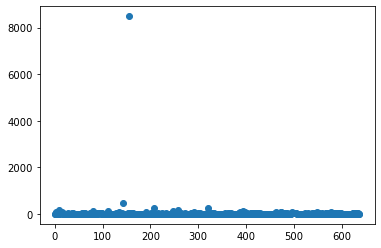

In [12]:
plt.scatter(predictions_df.index, predictions_df['perc_err'])

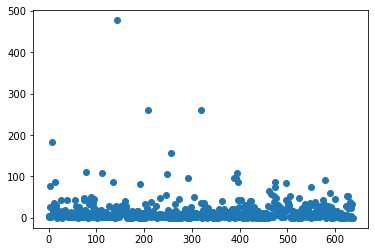

In [13]:
# ruling out our biggest outlier
no_ivory = predictions_df[predictions_df['perc_err'] < 6000]
plt.scatter(no_ivory.index, no_ivory['perc_err'])

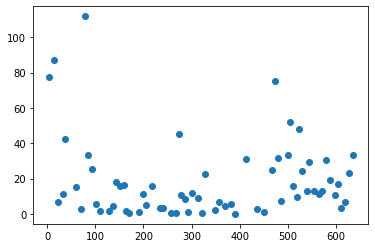

In [14]:
soybeans = predictions_df[predictions_df['crop'] == 'Soybeans']
plt.scatter(soybeans.index, soybeans['perc_err'])

<AxesSubplot:>

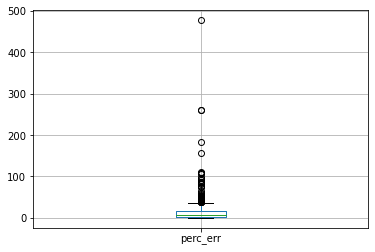

In [15]:
no_ivory.boxplot(column="perc_err")

<AxesSubplot:>

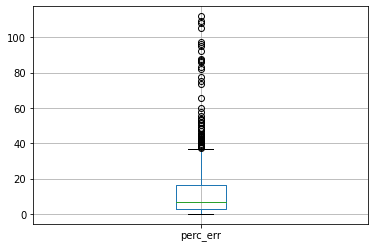

In [16]:
# Boxplot with the ~5 largest outliers removed with a cutoff of 150% error
no_150 = predictions_df[predictions_df['perc_err'] < 150]
no_150.boxplot(column="perc_err")

In [17]:
with pd.option_context('display.max_columns', None,):
    display(df[(df['area'] == "Côte d'Ivoire") & (df['crop'] == 'Sweet potatoes')])

,area,year,crop,yield,yield_1,yield_2,yield_3,yield_4,yield_5,avg_temp,avg_temp_1,avg_temp_2,avg_temp_3,avg_temp_4,avg_temp_5,latitude,longitude,tonnes_potash,tonnes_potash_1,tonnes_potash_2,tonnes_potash_3,tonnes_phosph,tonnes_phosph_1,tonnes_phosph_2,tonnes_phosph_3,tonnes_pesticide,tonnes_pesticide_1,tonnes_pesticide_2,tonnes_pesticide_3,tonnes_nitrogen,tonnes_nitrogen_1,tonnes_nitrogen_2,tonnes_nitrogen_3,arable_land,ag_land
894,Côte d'Ivoire,2008,Sweet potatoes,21500,21500,21500,21500,21499,21500,26.94,27.01,26.99,26.98,26.99,27.05,7.539989,-5.54708,30468.00,27853.00,30489.0,22859.0,4740.00,15809.00,22312.0,10746.0,93.0,93.0,93.0,93.0,17606.00,25909.00,10962.0,16180.0,2900.0,20600.0
902,Côte d'Ivoire,2009,Sweet potatoes,18654,21500,21500,21500,21500,21499,26.98,26.94,27.01,26.99,26.98,26.99,7.539989,-5.54708,16198.00,30468.00,27853.0,30489.0,6798.00,4740.00,15809.0,22312.0,93.0,93.0,93.0,93.0,21396.00,17606.00,25909.0,10962.0,2900.0,20600.0
910,Côte d'Ivoire,2010,Sweet potatoes,19031,18654,21500,21500,21500,21500,27.45,26.98,26.94,27.01,26.99,26.98,7.539989,-5.54708,43788.00,16198.00,30468.0,27853.0,22537.00,6798.00,4740.0,15809.0,93.0,93.0,93.0,93.0,26724.00,21396.00,17606.0,25909.0,2900.0,20600.0
918,Côte d'Ivoire,2011,Sweet potatoes,18690,19031,18654,21500,21500,21500,27.02,27.45,26.98,26.94,27.01,26.99,7.539989,-5.54708,21840.00,43788.00,16198.0,30468.0,9192.00,22537.00,6798.0,4740.0,93.0,93.0,93.0,93.0,25236.00,26724.00,21396.0,17606.0,2900.0,20600.0
926,Côte d'Ivoire,2012,Sweet potatoes,19169,18690,19031,18654,21500,21500,26.77,27.02,27.45,26.98,26.94,27.01,7.539989,-5.54708,26895.86,21840.00,43788.0,16198.0,18636.64,9192.00,22537.0,6798.0,93.0,93.0,93.0,93.0,32530.85,25236.00,26724.0,21396.0,3000.0,20700.0
934,Côte d'Ivoire,2013,Sweet potatoes,19306,19169,18690,19031,18654,21500,27.23,26.77,27.02,27.45,26.98,26.94,7.539989,-5.54708,39042.04,26895.86,21840.0,43788.0,36486.51,18636.64,9192.0,22537.0,93.0,93.0,93.0,93.0,33455.43,32530.85,25236.0,26724.0,3500.0,21200.0


In [18]:
predictions_df.to_csv("processed_data/predictions.csv")